In [2]:
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt

import collections
import os
import logging

import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

# import gui tkinter
from tkinter import Tk
import tkinter.filedialog as tkfd
import tkinter.simpledialog as tksd

In [3]:
logging.basicConfig(format='%(message)s', level='INFO')

**Login

In [4]:
#ask username and password

In [52]:
root = Tk()

username = tksd.askstring(title = "USERNAME", 
                          prompt = "Log in with Copernicus Open Access Hub username ...")

password = tksd.askstring(title = "PASSWORD", 
                          prompt = "... and password") 

root.destroy()

In [6]:
api = SentinelAPI(username, password, "https://scihub.copernicus.eu/dhus")

In [7]:
root = Tk()
download_dir = tkfd.askdirectory(title = "Select download folder", initialdir = "C:/")
bounding_box_flanders = tkfd.askopenfilename(title = "Select input GeoJSON, defining the bounding box of Flanders", 
                                             initialdir = "C:/", 
                                             filetypes = (("GeoJSON", "*.geojson"),("all files", "*.*")))
root.destroy()

In [8]:
download_dir

'C:/WERKMAP/Anaconda/sentinelsat/downloaded_datasets'

In [9]:
bounding_box_flanders

'C:/WERKMAP/Anaconda/sentinelsat/geojson/footprint_flanders_geojson.geojson'

**Download Sentinelsat data

**DOWNLOAD the DATA in BULK

define footprint

In [10]:
# define footprint = search the data by polygon
footprint_flanders_geojson = geojson_to_wkt(read_geojson(bounding_box_flanders))

In [11]:
footprint_flanders_geojson

'POLYGON ((2.5406630 50.6879597, 2.5406630 51.5056400, 5.9098982 51.5056400, 5.9098982 50.6879597, 2.5406630 50.6879597))'

GDAL data files not located, GDAL_DATA not set
PROJ data files not located, PROJ_LIB not set


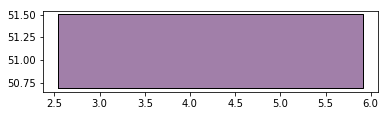

In [12]:
plot_geojson = gpd.read_file(bounding_box_flanders)
plot_geojson.plot()

set parameters

In [13]:
root = Tk()

startdate = tksd.askstring(title = "STARTDATE", 
                           prompt = "define startdate query (format: yyyymmdd)")

enddate = tksd.askstring(title = "ENDDATE", 
                         prompt = "define enddate query (format: yyyymmdd)")

min_cloud = tksd.askstring(title = "minimum cloudcover percentage", 
                           prompt = "define minimum cloudcover percentage (value from 0 to 100)")

max_cloud = tksd.askstring(title = "maximum cloudcover percentage", 
                           prompt = "define maximum cloudcover percentage (value from 0 to 100)")

root.destroy()

In [57]:
print("The following parameters are selected:")
print("- startdate =", startdate)
print("- enddate =", enddate)
print("- minimum cloudcover percentage =", min_cloud)
print("- maximum cloudcover percentage =", max_cloud)

The following parameters are selected:
- startdate = 20160601
- enddate = 20160630
- minimum cloudcover percentage = 0
- maximum cloudcover percentage = 30


In [53]:
# query the data by footprint, time, and keywords
products = api.query(footprint_flanders_geojson, 
                     startdate, 
                     enddate, 
                     platformname = 'Sentinel-2', 
                     cloudcoverpercentage = '[' + min_cloud + ' TO ' + max_cloud + ']'
                    )

In [54]:
# queried data is stored in dictionary
products

OrderedDict([('5c847bcf-f57a-4cb2-ae52-064aef8ba6ea',
              {'beginposition': datetime.datetime(2016, 6, 4, 10, 30, 26),
               'cloudcoverpercentage': 9.846105882352942,
               'endposition': datetime.datetime(2016, 6, 4, 10, 30, 26),
               'filename': 'S2A_OPER_PRD_MSIL1C_PDMC_20160718T095153_R108_V20160604T103026_20160604T103026.SAFE',
               'footprint': 'POLYGON ((5.933615765809156 52.31403780479302,5.9307234852508826 52.26905825882812,5.927820031395214 52.226225391291045,5.927968937642912 52.22622067850045,5.870215764132042 51.32806731121396,7.442095184333064 51.27892518278613,7.449316928500434 51.35153861060136,7.633943954138294 51.35482321981505,9.069950651279648 51.362769188761256,10.506317268777321 51.35310616658424,12.011254122594853 51.32452335478603,12.071774493973688 52.22166932163063,13.531032170485291 52.17548471916956,13.539120711237327 52.25263984456077,13.678544065009483 52.25515074878083,13.651048010503407 53.15353376744384,1

In [51]:
no_action = 0
action = 0
filesize = 0
for k, v in products.items():
    filename = v['filename']
    size = v['size']
    size = float(size[:-3])
    zipfile = filename[:-5] + '.zip'
    folder = download_dir + "/" + zipfile
    if os.path.exists(folder):
        no_action = no_action + 1
        print(zipfile, "already exists!")
    else:
        action = action + 1
        filesize = filesize + size
        print(zipfile, "will be downloaded (", size, "GB )...")
print("TO SUMMARISE:")
print(no_action, "file(s) already exist(s). The file(s) will be checked and updated if necessary.")
print(action, "file(s), or a total of", filesize, "GB, will be downloaded.")

S2A_OPER_PRD_MSIL1C_PDMC_20160718T095153_R108_V20160604T103026_20160604T103026.zip will be downloaded ( 6.21 GB )...
S2A_OPER_PRD_MSIL1C_PDMC_20160624T173545_R108_V20160624T103023_20160624T103023.zip already exists!
S2A_OPER_PRD_MSIL1C_PDMC_20160608T024107_R008_V20160607T104026_20160607T104026.zip will be downloaded ( 7.0 GB )...
S2A_OPER_PRD_MSIL1C_PDMC_20160608T023812_R008_V20160607T104026_20160607T104026.zip will be downloaded ( 7.3 GB )...
S2A_OPER_PRD_MSIL1C_PDMC_20160606T223859_R137_V20160606T110624_20160606T110624.zip will be downloaded ( 7.2 GB )...
S2A_OPER_PRD_MSIL1C_PDMC_20160606T223655_R137_V20160606T110624_20160606T110624.zip will be downloaded ( 7.2 GB )...
TO SUMMARISE:
1 file(s) already exist(s). The file(s) will be checked and updated if necessary.
5 file(s), or a total of 34.910000000000004 GB, will be downloaded.


In [21]:
api.download_all(products, directory_path = download_dir, checksum = True, check_existing = True)

Will download 1 products
MD5 checksumming: 100%|███████████████████| 7.13G/7.13G [01:38<00:00, 72.5MB/s]
C:/WERKMAP/Anaconda/sentinelsat/downloaded_datasets\S2A_OPER_PRD_MSIL1C_PDMC_20160624T173545_R108_V20160624T103023_20160624T103023.zip was already downloaded.
1/1 products downloaded


(OrderedDict([('fecc8b23-334f-432f-b1e8-7d6f5dbcb819',
               {'date': datetime.datetime(2016, 6, 24, 10, 30, 23),
                'downloaded_bytes': 0,
                'footprint': 'POLYGON((5.768514805040419 49.61961011420237,5.76603610582172 49.57468117064941,5.763545147601364 49.53174440621896,5.763667108760206 49.53174069023494,5.71408665774242 48.63304460468163,7.200980618578432 48.5883487810417,7.206138543130609 48.64878448309814,7.708337912131061 48.657376206712975,9.066139888020086 48.66460174366902,10.4242909875692 48.65581480408966,11.847478451946776 48.62982157570405,11.901972660129278 49.57135020997286,11.956634167396428 50.46945531986655,12.017025008525813 51.41234265506691,10.579515067442992 51.43967797551486,10.579544021469632 51.44054116582309,10.50920791123296 51.4410149183699,10.438876794404743 51.44235231685392,10.438850408836755 51.441488815004725,9.140455380717382 51.45023422258088,9.140457957691327 51.451098078258774,9.070084949391758 51.45070820629918,8

In [58]:
# GeoPandas GeoDataFrame with the metadata of the scenes and the footprints as geometries
geopanda_products = api.to_geodataframe(products)

In [59]:
geopanda_products

,summary,uuid,filename,format,identifier,instrumentshortname,sensoroperationalmode,instrumentname,s2datatakeid,platformidentifier,...,beginposition,endposition,cloudcoverpercentage,link,link_alternative,link_icon,title,orbitnumber,relativeorbitnumber,geometry
12884691-b14c-44d1-bada-3f2c51ab06f7,"Date: 2016-06-06T11:06:24Z, Instrument: MSI, M...",12884691-b14c-44d1-bada-3f2c51ab06f7,S2A_OPER_PRD_MSIL1C_PDMC_20160606T223859_R137_...,SAFE,S2A_OPER_PRD_MSIL1C_PDMC_20160606T223859_R137_...,MSI,INS-NOBS,Multi-Spectral Instrument,GS2A_20160606T110622_004996_N02.02,2015-000A,...,2016-06-06 11:06:24,2016-06-06 11:06:24,7.186513,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,S2A_OPER_PRD_MSIL1C_PDMC_20160606T223859_R137_...,4996,137,POLYGON ((-4.468471097411705 52.34134780285317...
317db6d1-1653-4947-b067-d77dd1db017d,"Date: 2016-06-07T10:40:26Z, Instrument: MSI, M...",317db6d1-1653-4947-b067-d77dd1db017d,S2A_OPER_PRD_MSIL1C_PDMC_20160608T024107_R008_...,SAFE,S2A_OPER_PRD_MSIL1C_PDMC_20160608T024107_R008_...,MSI,INS-NOBS,Multi-Spectral Instrument,GS2A_20160607T104032_005010_N02.02,2015-000A,...,2016-06-07 10:40:26,2016-06-07 10:40:26,24.552967,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,S2A_OPER_PRD_MSIL1C_PDMC_20160608T024107_R008_...,5010,8,"POLYGON ((2.999723171014824 49.60773992010596,..."
5c847bcf-f57a-4cb2-ae52-064aef8ba6ea,"Date: 2016-06-04T10:30:26Z, Instrument: MSI, M...",5c847bcf-f57a-4cb2-ae52-064aef8ba6ea,S2A_OPER_PRD_MSIL1C_PDMC_20160718T095153_R108_...,SAFE,S2A_OPER_PRD_MSIL1C_PDMC_20160718T095153_R108_...,MSI,INS-NOBS,Multi-Spectral Instrument,GS2A_20160604T103032_004967_N02.02,2015-000A,...,2016-06-04 10:30:26,2016-06-04 10:30:26,9.846106,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,S2A_OPER_PRD_MSIL1C_PDMC_20160718T095153_R108_...,4967,108,"POLYGON ((5.933615765809156 52.31403780479302,..."
b6b89998-39d8-4786-ba1d-e31d4405b9fc,"Date: 2016-06-07T10:40:26Z, Instrument: MSI, M...",b6b89998-39d8-4786-ba1d-e31d4405b9fc,S2A_OPER_PRD_MSIL1C_PDMC_20160608T023812_R008_...,SAFE,S2A_OPER_PRD_MSIL1C_PDMC_20160608T023812_R008_...,MSI,INS-NOBS,Multi-Spectral Instrument,GS2A_20160607T104032_005010_N02.02,2015-000A,...,2016-06-07 10:40:26,2016-06-07 10:40:26,11.668767,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,S2A_OPER_PRD_MSIL1C_PDMC_20160608T023812_R008_...,5010,8,"POLYGON ((4.467884152957832 52.34135509726958,..."
f6de91d8-2e64-4fed-b075-8d943a9a17fe,"Date: 2016-06-06T11:06:24Z, Instrument: MSI, M...",f6de91d8-2e64-4fed-b075-8d943a9a17fe,S2A_OPER_PRD_MSIL1C_PDMC_20160606T223655_R137_...,SAFE,S2A_OPER_PRD_MSIL1C_PDMC_20160606T223655_R137_...,MSI,INS-NOBS,Multi-Spectral Instrument,GS2A_20160606T110622_004996_N02.02,2015-000A,...,2016-06-06 11:06:24,2016-06-06 11:06:24,7.186513,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,S2A_OPER_PRD_MSIL1C_PDMC_20160606T223655_R137_...,4996,137,POLYGON ((-4.468471097411705 52.34134780285317...
fecc8b23-334f-432f-b1e8-7d6f5dbcb819,"Date: 2016-06-24T10:30:23Z, Instrument: MSI, M...",fecc8b23-334f-432f-b1e8-7d6f5dbcb819,S2A_OPER_PRD_MSIL1C_PDMC_20160624T173545_R108_...,SAFE,S2A_OPER_PRD_MSIL1C_PDMC_20160624T173545_R108_...,MSI,INS-NOBS,Multi-Spectral Instrument,GS2A_20160624T103022_005253_N02.04,2015-000A,...,2016-06-24 10:30:23,2016-06-24 10:30:23,29.470667,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,S2A_OPER_PRD_MSIL1C_PDMC_20160624T173545_R108_...,5253,108,"POLYGON ((5.7685148050

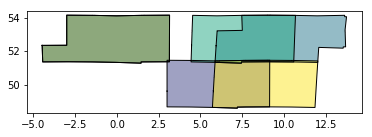

In [60]:
geopanda_products.plot()